In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare

from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [ ]:
t_train = pd.read_csv("/content/Traveldata_train_(1).csv")
s_train = pd.read_csv("/content/Surveydata_train_(1).csv")
t_test = pd.read_csv("/content/Traveldata_test.csv")
s_test = pd.read_csv("/content/Surveydata_test.csv")

In [ ]:
t_train.head(5)

ID  Gender    CustomerType   Age       TypeTravel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business travel     Business   

   Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  
0              272                     0.0                   5.0  
1             2200                     9.0                   0.0  
2             1061                    77.0                 119.0  
3              780                    13.0                  18.0  
4             1981                     0.0                   0.0

In [ ]:
s_train.head(5)

ID  Overall_Experience      Seat_comfort Seat_Class  \
0  98800001                   0  need improvement  Green Car   
1  98800002                   0              poor   Ordinary   
2  98800003                   1  need improvement  Green Car   
3  98800004                   0        acceptable   Ordinary   
4  98800005                   1        acceptable   Ordinary   

  Arrival_time_convenient          Catering Platform_location  \
0               excellent         excellent   very convinient   
1               excellent              poor  need improvement   
2        need improvement  need improvement  need improvement   
3        need improvement               NaN  need improvement   
4              acceptable        acceptable        manageable   

  Onboardwifi_service Onboard_entertainment Online_support Onlinebooking_Ease  \
0                good      need improvement     acceptable   need improvement   
1                good                  poor           good               good   
2    need improvement                  good      excellent          excellent   
3          acceptable      need improvement     acceptable         acceptable   
4    need improvement                  good      excellent               good   

    Onboard_service          Leg_room  Baggage_handling   Checkin_service  \
0  need improvement        acceptable  need improvement              good   
1         excellent  need improvement              poor  need improvement   
2         excellent         excellent         excellent              good   
3        acceptable        acceptable        acceptable              good   
4              good              good              good              good   

        Cleanliness Online_boarding  
0  need improvement            poor  
1              good            good  
2         excellent       excellent  
3        acceptable      acceptable  
4              good            good

In [ ]:
l=[t_train, s_train]

In [ ]:
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94

In [ ]:
for i in l:
    print(i.nunique())

ID                        94379
Gender                        2
CustomerType                  2
Age                          75
TypeTravel                    2
Travel_Class                  2
Travel_Distance            5210
DepartureDelay_in_Mins      437
ArrivalDelay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_comfort                   6
Seat_Class                     2
Arrival_time_convenient        6
Catering                       6
Platform_location              6
Onboardwifi_service            6
Onboard_entertainment          6
Online_support                 6
Onlinebooking_Ease             6
Onboard_service                6
Leg_room                       6
Baggage_handling               5
Checkin_service                6
Cleanliness                    6
Online_boarding                6
dtype: int64


In [ ]:
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [ ]:
df_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape

(35602, 23)

In [ ]:
df_train.head(5)

Gender    CustomerType   Age       TypeTravel Travel_Class  \
ID                                                                     
98800001  Female  Loyal Customer  52.0              NaN     Business   
98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
98800003  Female  Loyal Customer  43.0  Business travel     Business   
98800004  Female  Loyal Customer  44.0  Business travel     Business   
98800005  Female  Loyal Customer  50.0  Business travel     Business   

          Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
ID                                                                        
98800001              272                     0.0                   5.0   
98800002             2200                     9.0                   0.0   
98800003             1061                    77.0                 119.0   
98800004              780                    13.0                  18.0   
98800005             1981                     0.0                   0.0   

          Overall_Experience      Seat_comfort  ... Onboardwifi_service  \
ID                                              ...                       
98800001                   0  need improvement  ...                good   
98800002                   0              poor  ...                good   
98800003                   1  need improvement  ...    need improvement   
98800004                   0        acceptable  ...          acceptable   
98800005                   1        acceptable  ...    need improvement   

         Onboard_entertainment Online_support Onlinebooking_Ease  \
ID                                                                 
98800001      need improvement     acceptable   need improvement   
98800002                  poor           good               good   
98800003                  good      excellent          excellent   
98800004      need improvement     acceptable         acceptable   
98800005                  good      excellent               good   

           Onboard_service          Leg_room  Baggage_handling  \
ID                                                               
98800001  need improvement        acceptable  need improvement   
98800002         excellent  need improvement              poor   
98800003         excellent         excellent         excellent   
98800004        acceptable        acceptable        acceptable   
98800005              good              good              good   

           Checkin_service       Cleanliness Online_boarding  
ID                                                            
98800001              good  need improvement            poor  
98800002  need improvement              good            good  
98800003              good         excellent       excellent  
98800004              good        acceptable      acceptable  
98800005              good              good            good  

[5 rows x 24 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_

In [ ]:
df_train.describe()

Age  Travel_Distance  DepartureDelay_in_Mins  \
count  94346.000000     94379.000000            94322.000000   
mean      39.419647      1978.888185               14.647092   
std       15.116632      1027.961019               38.138781   
min        7.000000        50.000000                0.000000   
25%       27.000000      1359.000000                0.000000   
50%       40.000000      1923.000000                0.000000   
75%       51.000000      2538.000000               12.000000   
max       85.000000      6951.000000             1592.000000   

       ArrivalDelay_in_Mins  Overall_Experience  
count          94022.000000        94379.000000  
mean              15.005222            0.546658  
std               38.439409            0.497821  
min                0.000000            0.000000  
25%                0.000000            0.000000  
50%                0.000000            1.000000  
75%               13.000000            1.000000  
max             1584.000000            1.000000

EDA

In [ ]:
df_train.DepartureDelay_in_Mins.fillna(df_train.ArrivalDelay_in_Mins, inplace=True)
df_train.ArrivalDelay_in_Mins.fillna(df_train.DepartureDelay_in_Mins, inplace=True)

In [ ]:
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'DepartureDelay_in_Mins',
                                               'ArrivalDelay_in_Mins', 'Seat_Comfort', 'Platform_Location',
                                               'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                                               'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
                                               'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])


KeyError: ignored

In [ ]:
target = ['Overall_Experience']

In [ ]:
num_col = ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']

In [ ]:
all_col = list(df_train.columns)
all_col

['Gender',
 'CustomerType',
 'Age',
 'TypeTravel',
 'Travel_Class',
 'Travel_Distance',
 'DepartureDelay_in_Mins',
 'ArrivalDelay_in_Mins',
 'Overall_Experience',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [ ]:
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

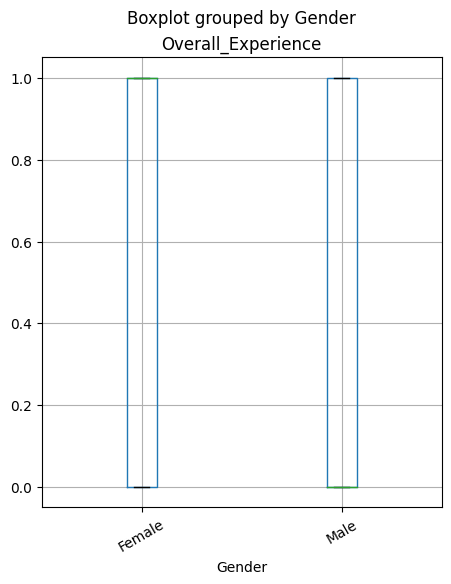

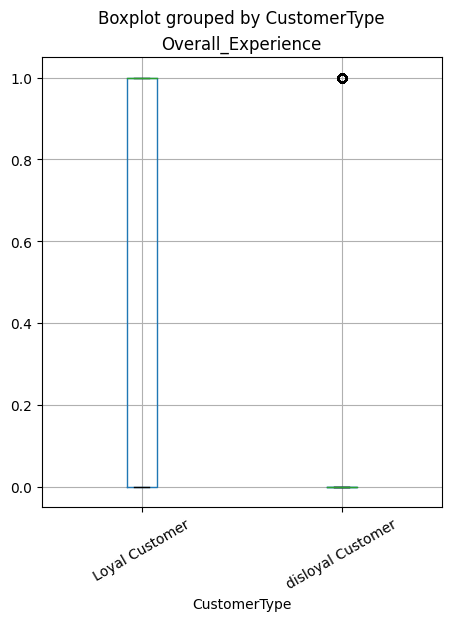

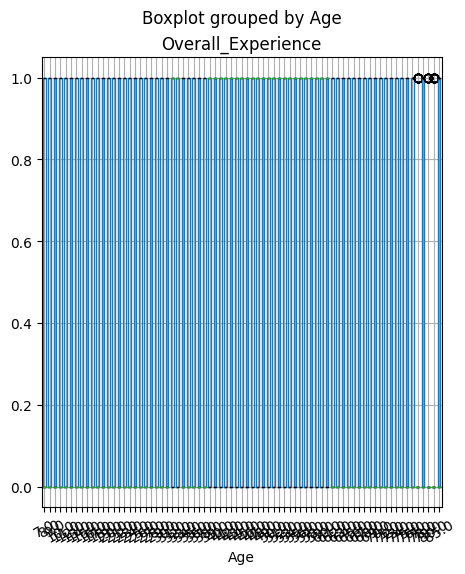

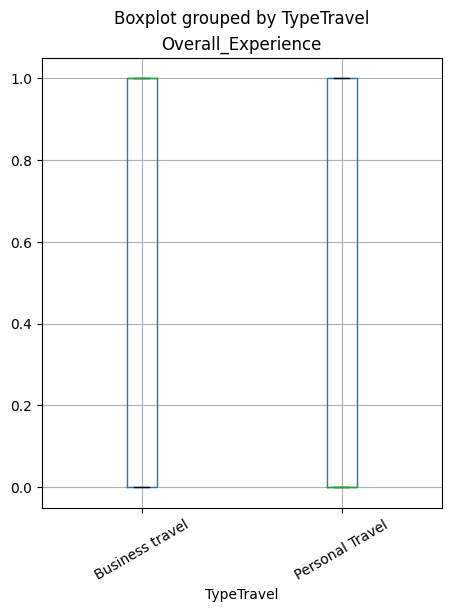

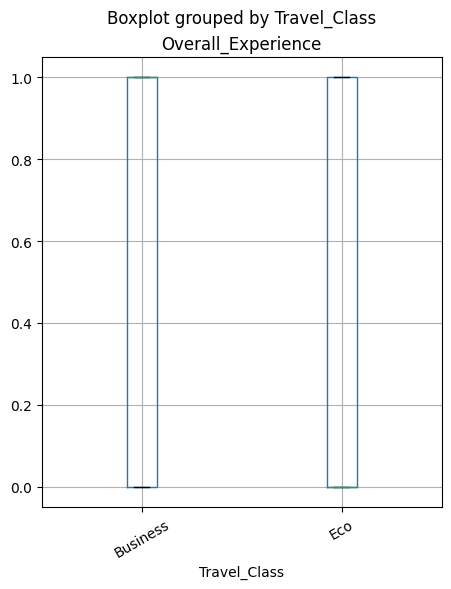

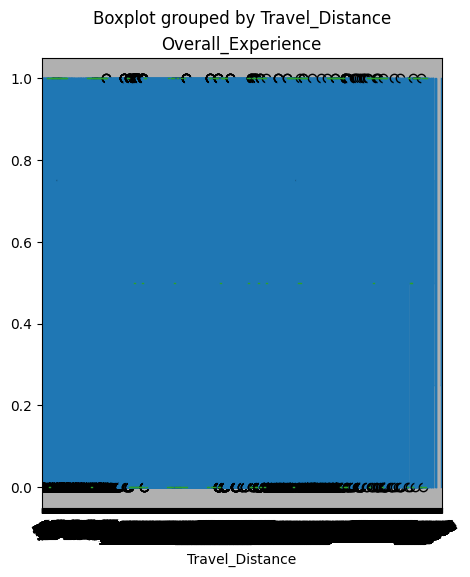

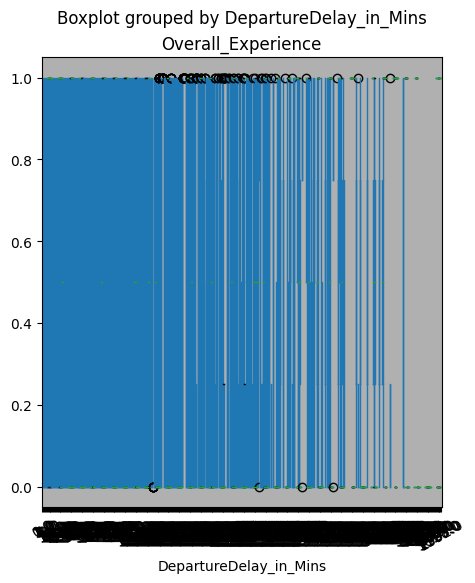

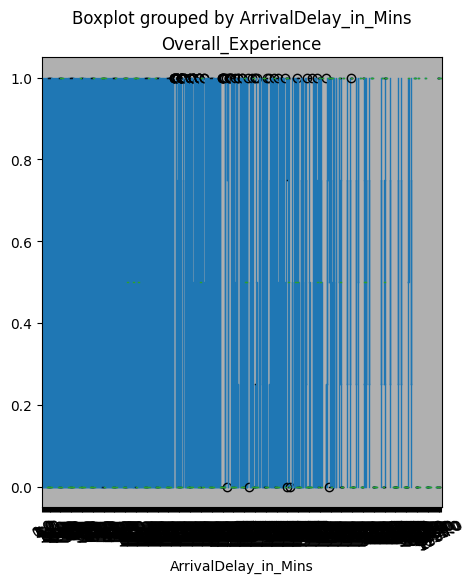

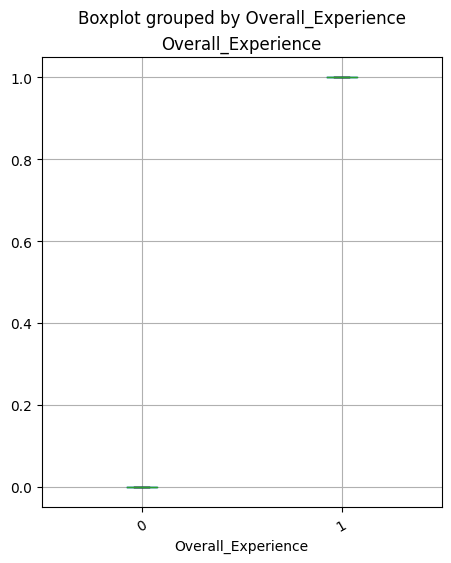

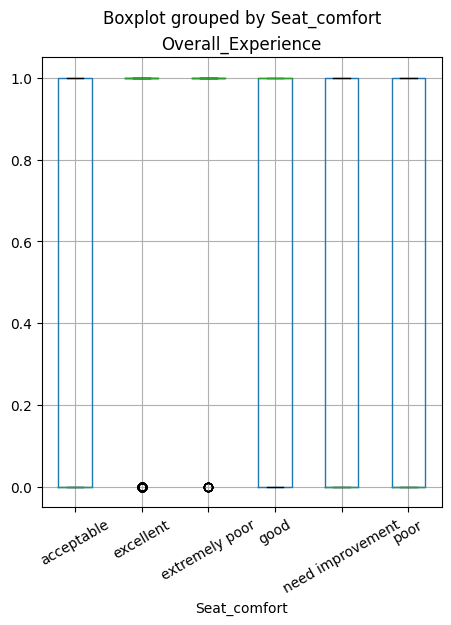

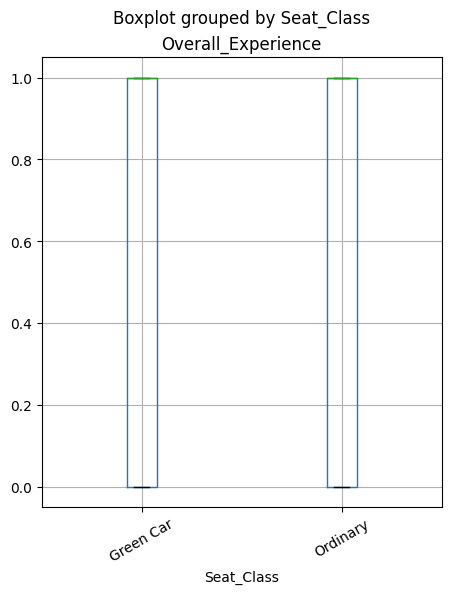

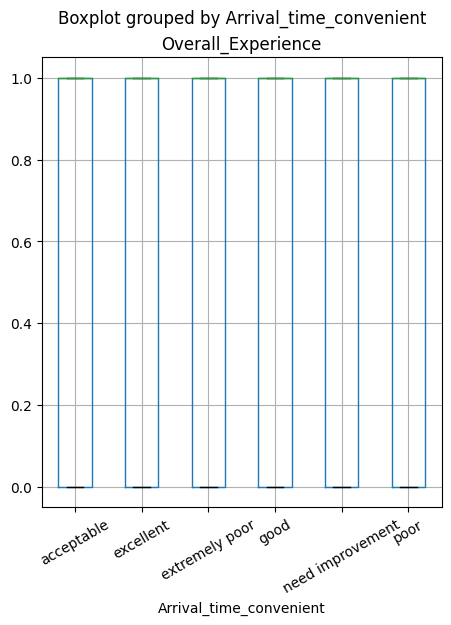

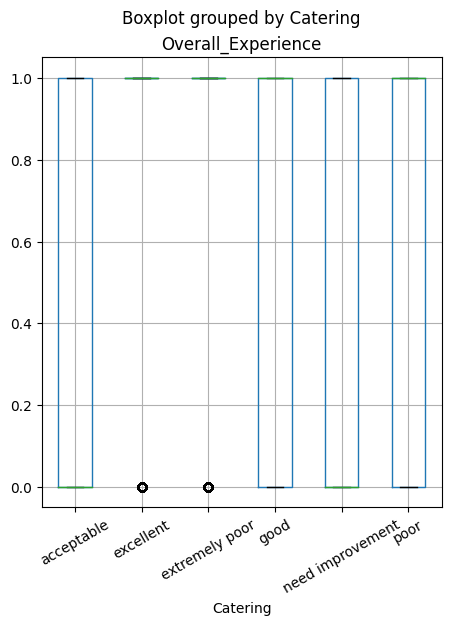

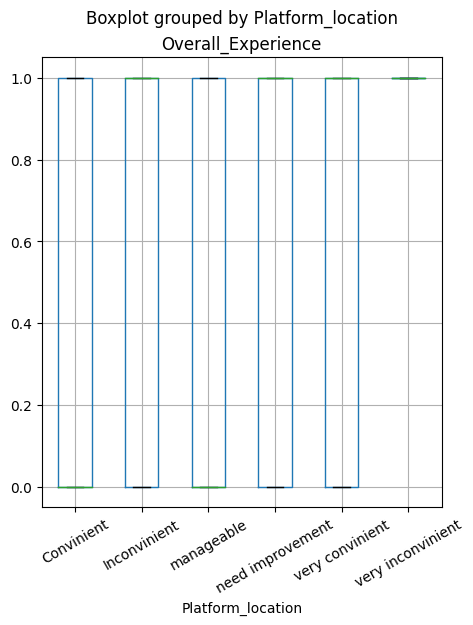

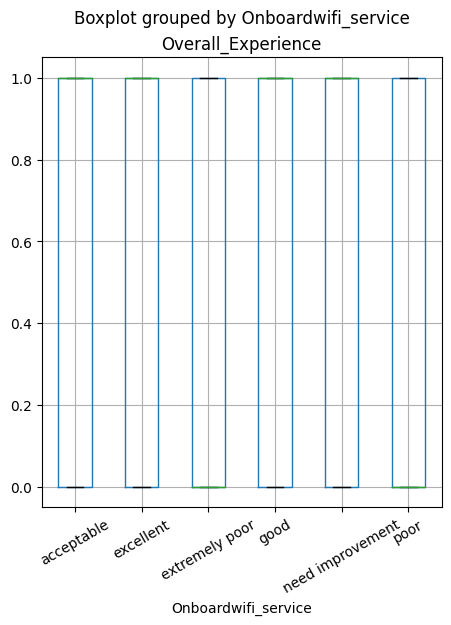

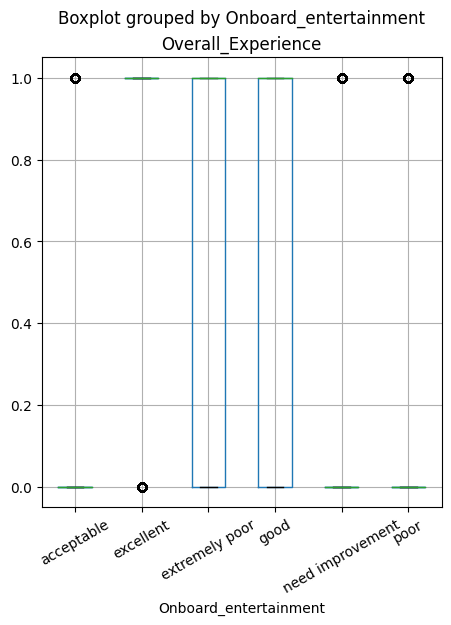

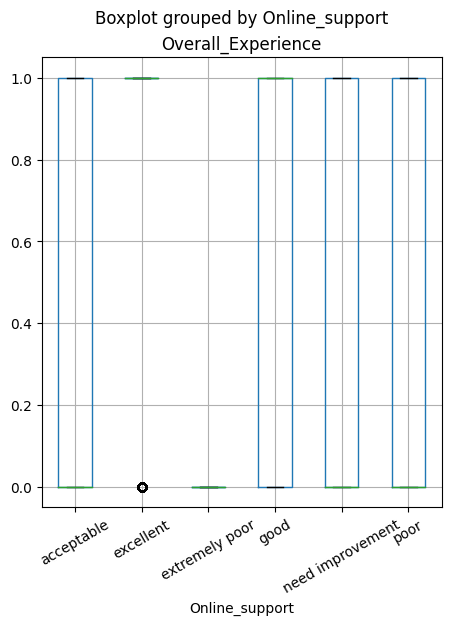

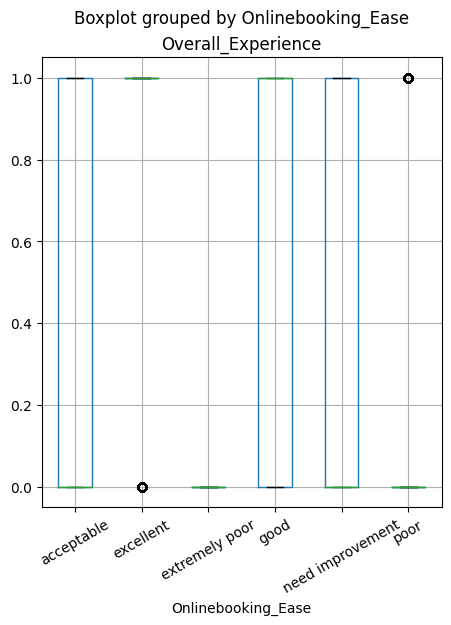

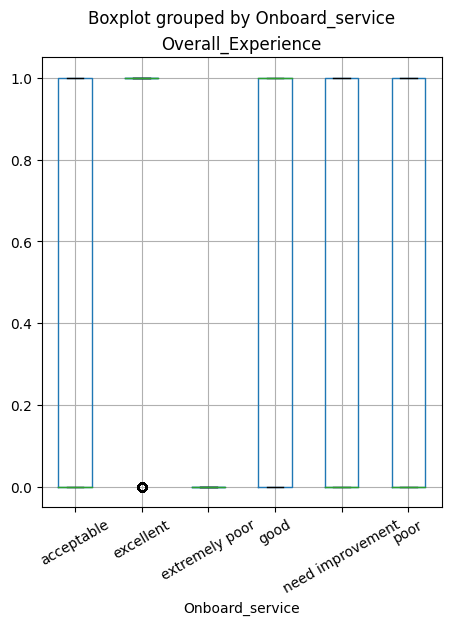

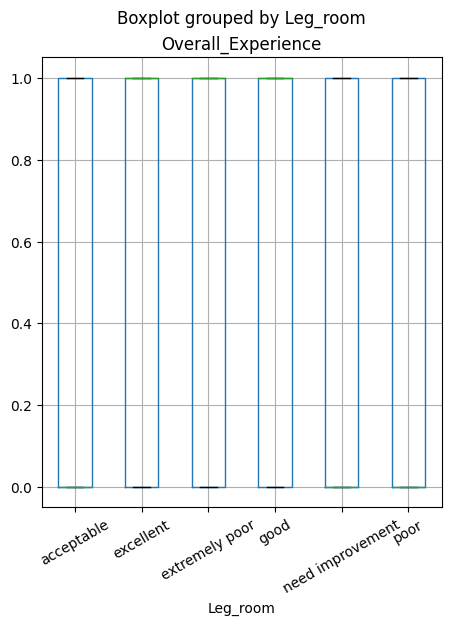

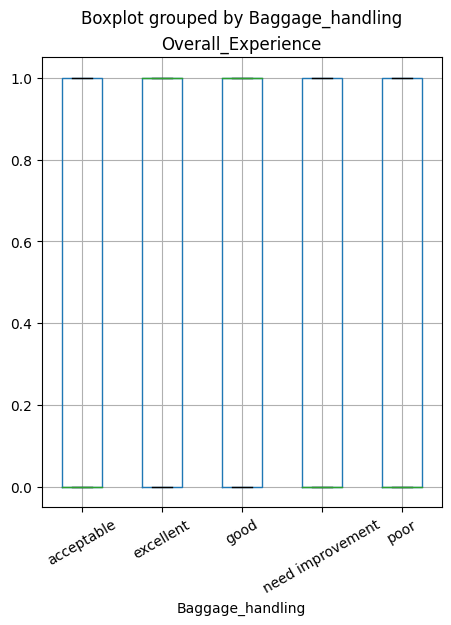

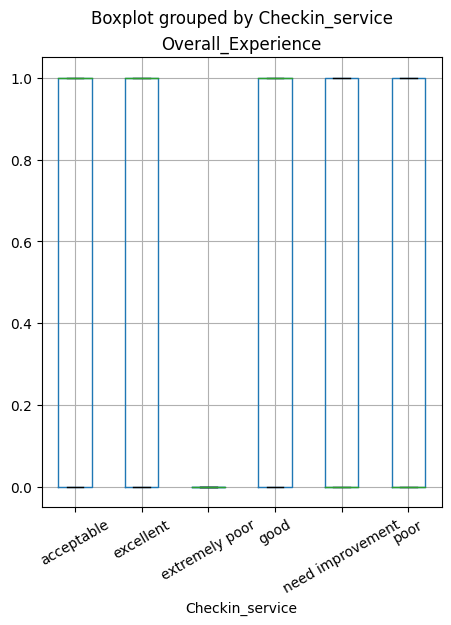

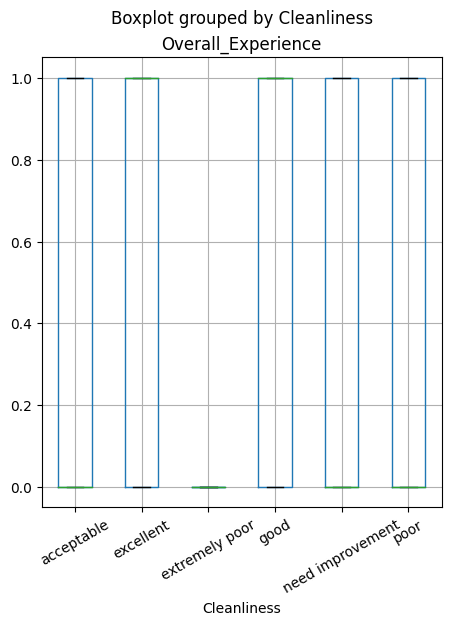

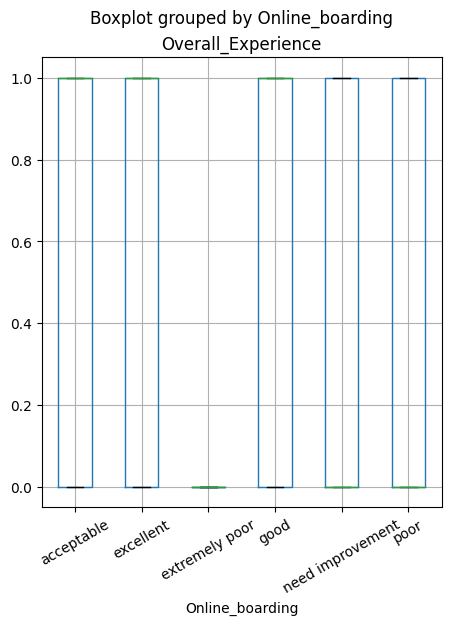

In [ ]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


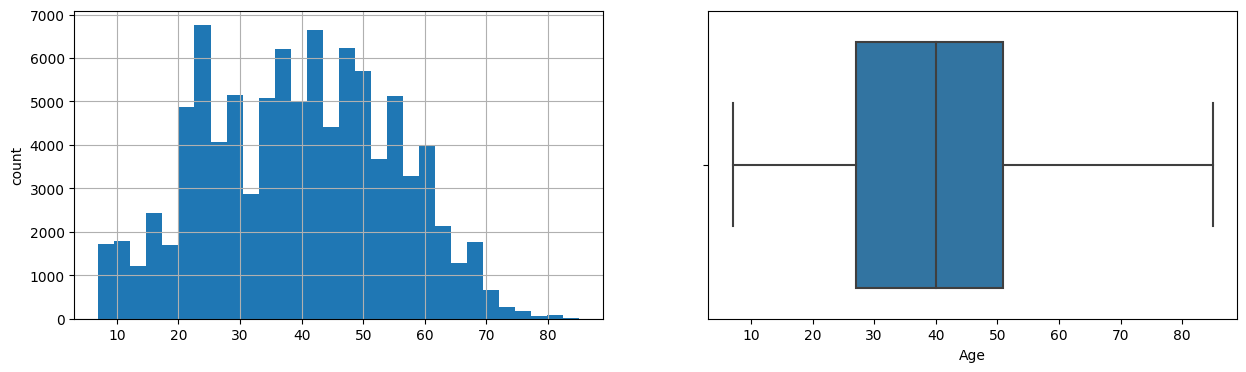

Travel_Distance
Skew : 0.47


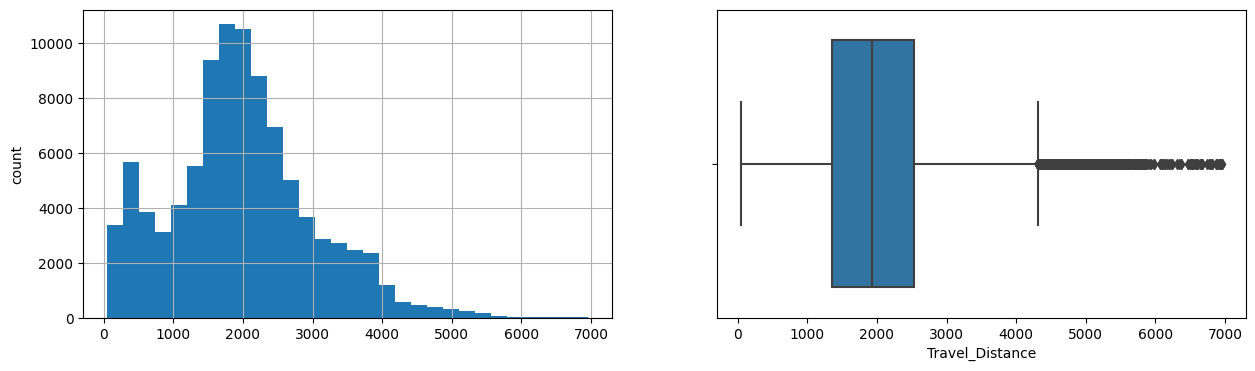

DepartureDelay_in_Mins
Skew : 7.16


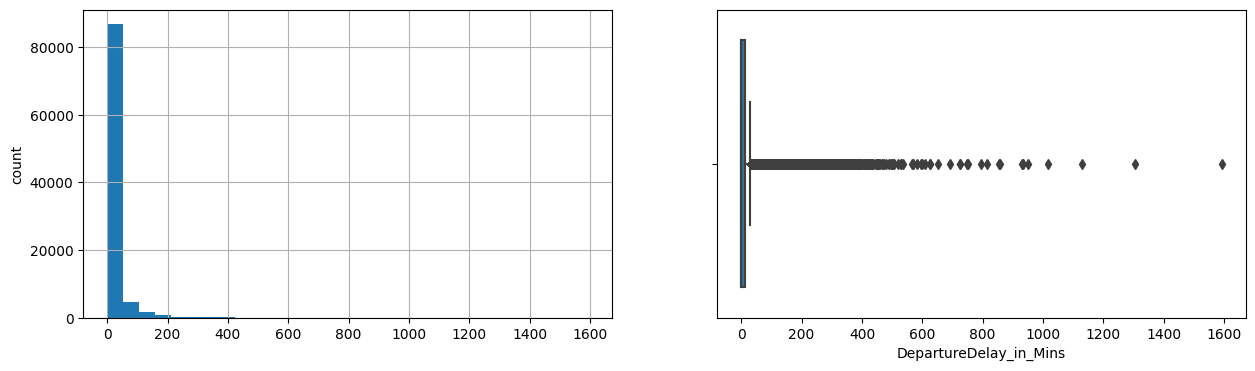

ArrivalDelay_in_Mins
Skew : 6.95


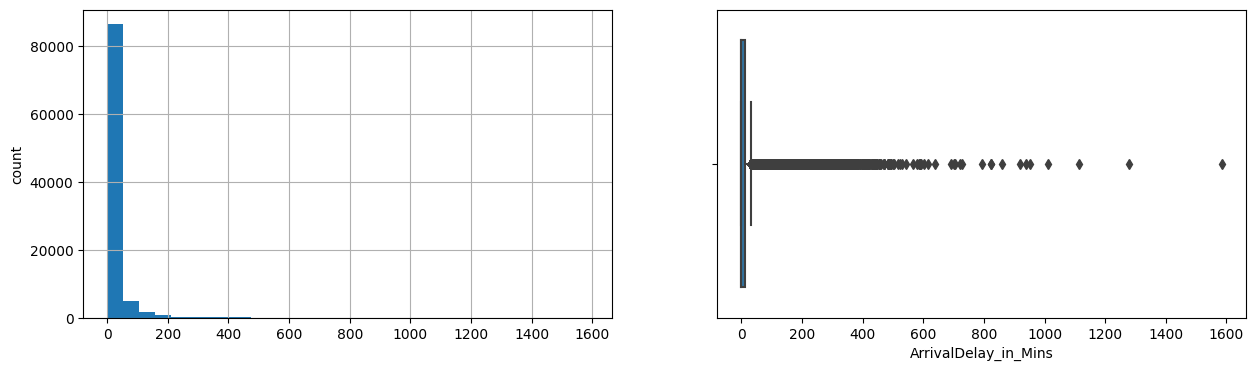

In [ ]:
data = df_train

for col in num_col:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

Preprocessing

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94322 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_

In [ ]:
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)

    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)

    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)

print(df_train.shape)

(94379, 24)
i== Age
Mean, Std: 39.41964683187417 15.116551741275961
Lower, Upper: -5.930008391953713 84.76930205570204
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.725119487924 1027.9072905845096
Lower, Upper: -1104.9967522656048 5062.446991241453
Identified outliers: 618
i== DepartureDelay_in_Mins
Mean, Std: 14.397359263924173 37.392530218878996
Lower, Upper: -97.78023139271282 126.57494992056117
Identified outliers: 1915
i== ArrivalDelay_in_Mins
Mean, Std: 10.905024463065674 22.10902418620171
Lower, Upper: -55.422048095539466 77.23209702167081
Identified outliers: 2739
(89089, 24)


In [ ]:
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)

In [ ]:
ind_train = df_train.index
ind_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.tail()

Gender       CustomerType   Age       TypeTravel Travel_Class  \
ID                                                                        
99935598    Male     Loyal Customer   8.0  Personal Travel          Eco   
99935599  Female     Loyal Customer  53.0  Business travel     Business   
99935600    Male  disloyal Customer  22.0  Business travel          Eco   
99935601  Female     Loyal Customer  67.0  Personal Travel          Eco   
99935602    Male                NaN  20.0  Personal Travel          Eco   

          Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
ID                                                                        
99935598             1334                     0.0                   0.0   
99935599             1772                     0.0                   0.0   
99935600             1180                     0.0                   0.0   
99935601              420                    23.0                  16.0   
99935602             1680                     0.0                   0.0   

              Seat_comfort Seat_Class  ... Onboardwifi_service  \
ID                                     ...                       
99935598  need improvement  Green Car  ...          acceptable   
99935599  need improvement   Ordinary  ...          acceptable   
99935600              good  Green Car  ...    need improvement   
99935601         excellent   Ordinary  ...          acceptable   
99935602              good   Ordinary  ...                poor   

         Onboard_entertainment Online_support Onlinebooking_Ease  \
ID                                                                 
99935598      need improvement     acceptable         acceptable   
99935599             excellent      excellent               good   
99935600                  good           poor   need improvement   
99935601             excellent           good          excellent   
99935602                  good           poor               poor   

         Onboard_service    Leg_room Baggage_handling   Checkin_service  \
ID                                                                        
99935598            good   excellent             good        acceptable   
99935599            good        good             good        acceptable   
99935600            poor  acceptable             poor              poor   
99935601       excellent   excellent        excellent        acceptable   
99935602      acceptable        good             good  need improvement   

         Cleanliness   Online_boarding  
ID                                      
99935598        good        acceptable  
99935599        good              good  
99935600   excellent  need improvement  
99935601   excellent              good  
99935602        good              poor  

[5 rows x 23 columns]

In [ ]:
df.DepartureDelay_in_Mins.fillna(df.ArrivalDelay_in_Mins, inplace=True)
df.ArrivalDelay_in_Mins.fillna(df.DepartureDelay_in_Mins, inplace=True)

In [ ]:
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'],
           [6, 5, 4, 3, 2, 1])

In [ ]:
df.head()

Gender CustomerType   Age       TypeTravel  Travel_Class  \
ID                                                                   
98800001     0.0            1  52.0              NaN             1   
98800002     1.0            1  48.0                0             0   
98800004     0.0            1  44.0  Business travel             1   
98800005     0.0            1  50.0  Business travel             1   
98800006     1.0            1  44.0  Business travel             1   

          Travel_Distance  DepartureDelay_in_Mins  ArrivalDelay_in_Mins  \
ID                                                                        
98800001              272                     0.0                   5.0   
98800002             2200                     9.0                   0.0   
98800004              780                    13.0                  18.0   
98800005             1981                     0.0                   0.0   
98800006             2810                     0.0                   0.0   

              Seat_comfort  Seat_Class  ... Onboardwifi_service  \
ID                                      ...                       
98800001  need improvement           1  ...                good   
98800002              poor           0  ...                good   
98800004        acceptable           0  ...          acceptable   
98800005        acceptable           0  ...    need improvement   
98800006  need improvement           0  ...                good   

         Onboard_entertainment Online_support Onlinebooking_Ease  \
ID                                                                 
98800001      need improvement     acceptable   need improvement   
98800002                  poor           good               good   
98800004      need improvement     acceptable         acceptable   
98800005                  good      excellent               good   
98800006             excellent           good         acceptable   

           Onboard_service          Leg_room  Baggage_handling  \
ID                                                               
98800001  need improvement        acceptable  need improvement   
98800002         excellent  need improvement              poor   
98800004        acceptable        acceptable        acceptable   
98800005              good              good              good   
98800006        acceptable              good        acceptable   

           Checkin_service       Cleanliness Online_boarding  
ID                                                            
98800001              good  need improvement            poor  
98800002  need improvement              good            good  
98800004              good        acceptable      acceptable  
98800005              good              good            good  
98800006        acceptable        acceptable      acceptable  

[5 rows x 23 columns]

In [ ]:
#df = pd.get_dummies(df)
#df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124691 entries, 98800001 to 99935602
Data columns (total 92 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Gender                                    124589 non-null  float64
 1   Age                                       124648 non-null  float64
 2   Travel_Class                              124691 non-null  int64  
 3   Travel_Distance                           124691 non-null  int64  
 4   DepartureDelay_in_Mins                    124605 non-null  float64
 5   ArrivalDelay_in_Mins                      124605 non-null  float64
 6   Seat_Class                                124691 non-null  int64  
 7   CustomerType_1                            124691 non-null  uint8  
 8   CustomerType_disloyal Customer            124691 non-null  uint8  
 9   TypeTravel_0                              124691 non-null  uint8  
 10  TypeTravel_

In [ ]:
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

In [ ]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))
    print('*'*40)

0.0    0.507477
1.0    0.492523
Name: Gender, dtype: float64
****************************************
39.0    0.028536
25.0    0.026828
40.0    0.024846
44.0    0.023939
41.0    0.023891
          ...   
76.0    0.000473
74.0    0.000441
79.0    0.000393
78.0    0.000337
85.0    0.000056
Name: Age, Length: 75, dtype: float64
****************************************
0    0.522419
1    0.477581
Name: Travel_Class, dtype: float64
****************************************
1963    0.000706
1812    0.000698
1639    0.000682
1789    0.000674
1759    0.000658
          ...   
5069    0.000008
4156    0.000008
4724    0.000008
4954    0.000008
5090    0.000008
Name: Travel_Distance, Length: 5057, dtype: float64
****************************************
0.0      0.586461
1.0      0.029413
2.0      0.022848
3.0      0.020224
4.0      0.018442
           ...   
234.0    0.000008
296.0    0.000008
371.0    0.000008
267.0    0.000008
420.0    0.000008
Name: DepartureDelay_in_Mins, Length: 350, dtype: 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [ ]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [ ]:
df

Gender   Age  Travel_Class  Travel_Distance  DepartureDelay_in_Mins  \
ID                                                                              
98800001     0.0  52.0           1.0            272.0                     0.0   
98800002     1.0  48.0           0.0           2200.0                     9.0   
98800004     0.0  44.0           1.0            780.0                    13.0   
98800005     0.0  50.0           1.0           1981.0                     0.0   
98800006     1.0  44.0           1.0           2810.0                     0.0   
...          ...   ...           ...              ...                     ...   
99935598     1.0   8.0           0.0           1334.0                     0.0   
99935599     0.0  53.0           1.0           1772.0                     0.0   
99935600     1.0  22.0           0.0           1180.0                     0.0   
99935601     0.0  67.0           0.0            420.0                    23.0   
99935602     1.0  20.0           0.0           1680.0                     0.0   

          ArrivalDelay_in_Mins  Seat_Class  CustomerType_1  \
ID                                                           
98800001                   5.0         1.0             1.0   
98800002                   0.0         0.0             1.0   
98800004                  18.0         0.0             1.0   
98800005                   0.0         0.0             1.0   
98800006                   0.0         0.0             1.0   
...                        ...         ...             ...   
99935598                   0.0         1.0             1.0   
99935599                   0.0         0.0             1.0   
99935600                   0.0         1.0             0.0   
99935601                  16.0         0.0             1.0   
99935602                   0.0         0.0             0.0   

          CustomerType_disloyal Customer  TypeTravel_0  ...  \
ID                                                      ...   
98800001                             0.0           0.0  ...   
98800002                             0.0           1.0  ...   
98800004                             0.0           0.0  ...   
98800005                             0.0           0.0  ...   
98800006                             0.0           0.0  ...   
...                                  ...           ...  ...   
99935598                             0.0           1.0  ...   
99935599                             0.0           0.0  ...   
99935600                             1.0           0.0  ...   
99935601                             0.0           1.0  ...   
99935602                             0.0           1.0  ...   

          Cleanliness_extremely poor  Cleanliness_good  \
ID                                                       
98800001                         0.0               0.0   
98800002                         0.0               1.0   
98800004                         0.0               0.0   
98800005                         0.0               1.0   
98800006                         0.0               0.0   
...                              ...               ...   
99935598                         0.0               1.0   
99935599                         0.0               1.0   
99935600                         0.0               0.0   
99935601                         0.0               0.0   
99935602                         0.0               1.0   

          Cleanliness_need improvement  Cleanliness_poor  \
ID                                                         
98800001                           1.0               0.0   
98800002                           0.0               0.0   
98800004                           0.0               0.0   
98800005                           0.0               0.0   
98800006                           0.0               0.0   
...                                ...               ...   
99935598                           0.0               0.0   
99935599                          

In [ ]:
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

In [ ]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))
    print('*'*40)

0.000000    0.507174
1.000000    0.492225
0.333333    0.000353
0.666667    0.000249
Name: Gender, dtype: float64
****************************************
39.000000    0.028527
25.000000    0.026834
40.000000    0.024845
44.000000    0.023931
41.000000    0.023891
               ...   
34.666667    0.000008
39.666667    0.000008
33.666667    0.000008
59.333333    0.000008
27.333333    0.000008
Name: Age, Length: 94, dtype: float64
****************************************
0.0    0.522419
1.0    0.477581
Name: Travel_Class, dtype: float64
****************************************
1963.0    0.000706
1812.0    0.000698
1639.0    0.000682
1789.0    0.000674
1759.0    0.000658
            ...   
5069.0    0.000008
4156.0    0.000008
4724.0    0.000008
4954.0    0.000008
5090.0    0.000008
Name: Travel_Distance, Length: 5057, dtype: float64
****************************************
0.000000      0.586257
1.000000      0.029433
2.000000      0.022840
3.000000      0.020218
4.000000      0.018430


In [ ]:
df = df.round(decimals = 0)
df = df.astype(int)

In [ ]:
df.head()

Gender  Age  Travel_Class  Travel_Distance  DepartureDelay_in_Mins  \
ID                                                                             
98800001       0   52             1              272                       0   
98800002       1   48             0             2200                       9   
98800004       0   44             1              780                      13   
98800005       0   50             1             1981                       0   
98800006       1   44             1             2810                       0   

          ArrivalDelay_in_Mins  Seat_Class  CustomerType_1  \
ID                                                           
98800001                     5           1               1   
98800002                     0           0               1   
98800004                    18           0               1   
98800005                     0           0               1   
98800006                     0           0               1   

          CustomerType_disloyal Customer  TypeTravel_0  ...  \
ID                                                      ...   
98800001                               0             0  ...   
98800002                               0             1  ...   
98800004                               0             0  ...   
98800005                               0             0  ...   
98800006                               0             0  ...   

          Cleanliness_extremely poor  Cleanliness_good  \
ID                                                       
98800001                           0                 0   
98800002                           0                 1   
98800004                           0                 0   
98800005                           0                 1   
98800006                           0                 0   

          Cleanliness_need improvement  Cleanliness_poor  \
ID                                                         
98800001                             1                 0   
98800002                             0                 0   
98800004                             0                 0   
98800005                             0                 0   
98800006                             0                 0   

          Online_boarding_acceptable  Online_boarding_excellent  \
ID                                                                
98800001                           0                          0   
98800002                           0                          0   
98800004                           1                          0   
98800005                           0                          0   
98800006                           1                          0   

          Online_boarding_extremely poor  Online_boarding_good  \
ID                                                               
98800001                               0                     0   
98800002                               0                     1   
98800004                               0                     0   
98800005                               0                     1   
98800006                               0                     0   

          Online_boarding_need improvement  Online_boarding_poor  
ID                                                                
98800001                                 0                     1  
98800002                                 0                     0  
98800004                                 0                     0  
98800005                                 0                     0  
98800006                                 0                     0  

[5 rows x 92 columns]

In [ ]:
df = df.drop(['DepartureDelay_in_Mins'], axis=1)

In [ ]:
df

Gender  Age  Travel_Class  Travel_Distance  ArrivalDelay_in_Mins  \
ID                                                                           
98800001       0   52             1              272                     5   
98800002       1   48             0             2200                     0   
98800004       0   44             1              780                    18   
98800005       0   50             1             1981                     0   
98800006       1   44             1             2810                     0   
...          ...  ...           ...              ...                   ...   
99935598       1    8             0             1334                     0   
99935599       0   53             1             1772                     0   
99935600       1   22             0             1180                     0   
99935601       0   67             0              420                    16   
99935602       1   20             0             1680                     0   

          Seat_Class  CustomerType_1  CustomerType_disloyal Customer  \
ID                                                                     
98800001           1               1                               0   
98800002           0               1                               0   
98800004           0               1                               0   
98800005           0               1                               0   
98800006           0               1                               0   
...              ...             ...                             ...   
99935598           1               1                               0   
99935599           0               1                               0   
99935600           1               0                               1   
99935601           0               1                               0   
99935602           0               0                               0   

          TypeTravel_0  TypeTravel_Business travel  ...  \
ID                                                  ...   
98800001             0                           0  ...   
98800002             1                           0  ...   
98800004             0                           1  ...   
98800005             0                           1  ...   
98800006             0                           1  ...   
...                ...                         ...  ...   
99935598             1                           0  ...   
99935599             0                           1  ...   
99935600             0                           1  ...   
99935601             1                           0  ...   
99935602             1                           0  ...   

          Cleanliness_extremely poor  Cleanliness_good  \
ID                                                       
98800001                           0                 0   
98800002                           0                 1   
98800004                           0                 0   
98800005                           0                 1   
98800006                           0                 0   
...                              ...               ...   
99935598                           0                 1   
99935599                           0                 1   
99935600                           0                 0   
99935601                           0                 0   
99935602                           0                 1   

          Cleanliness_need improvement  Cleanliness_poor  \
ID                                                         
98800001                             1                 0   
98800002                             0                 0   
98800004                             0                 0   
98800005                             0                 0   
98800006                             0                 0   
...                                ...               ...   
99935598                             0                 

<Axes: >

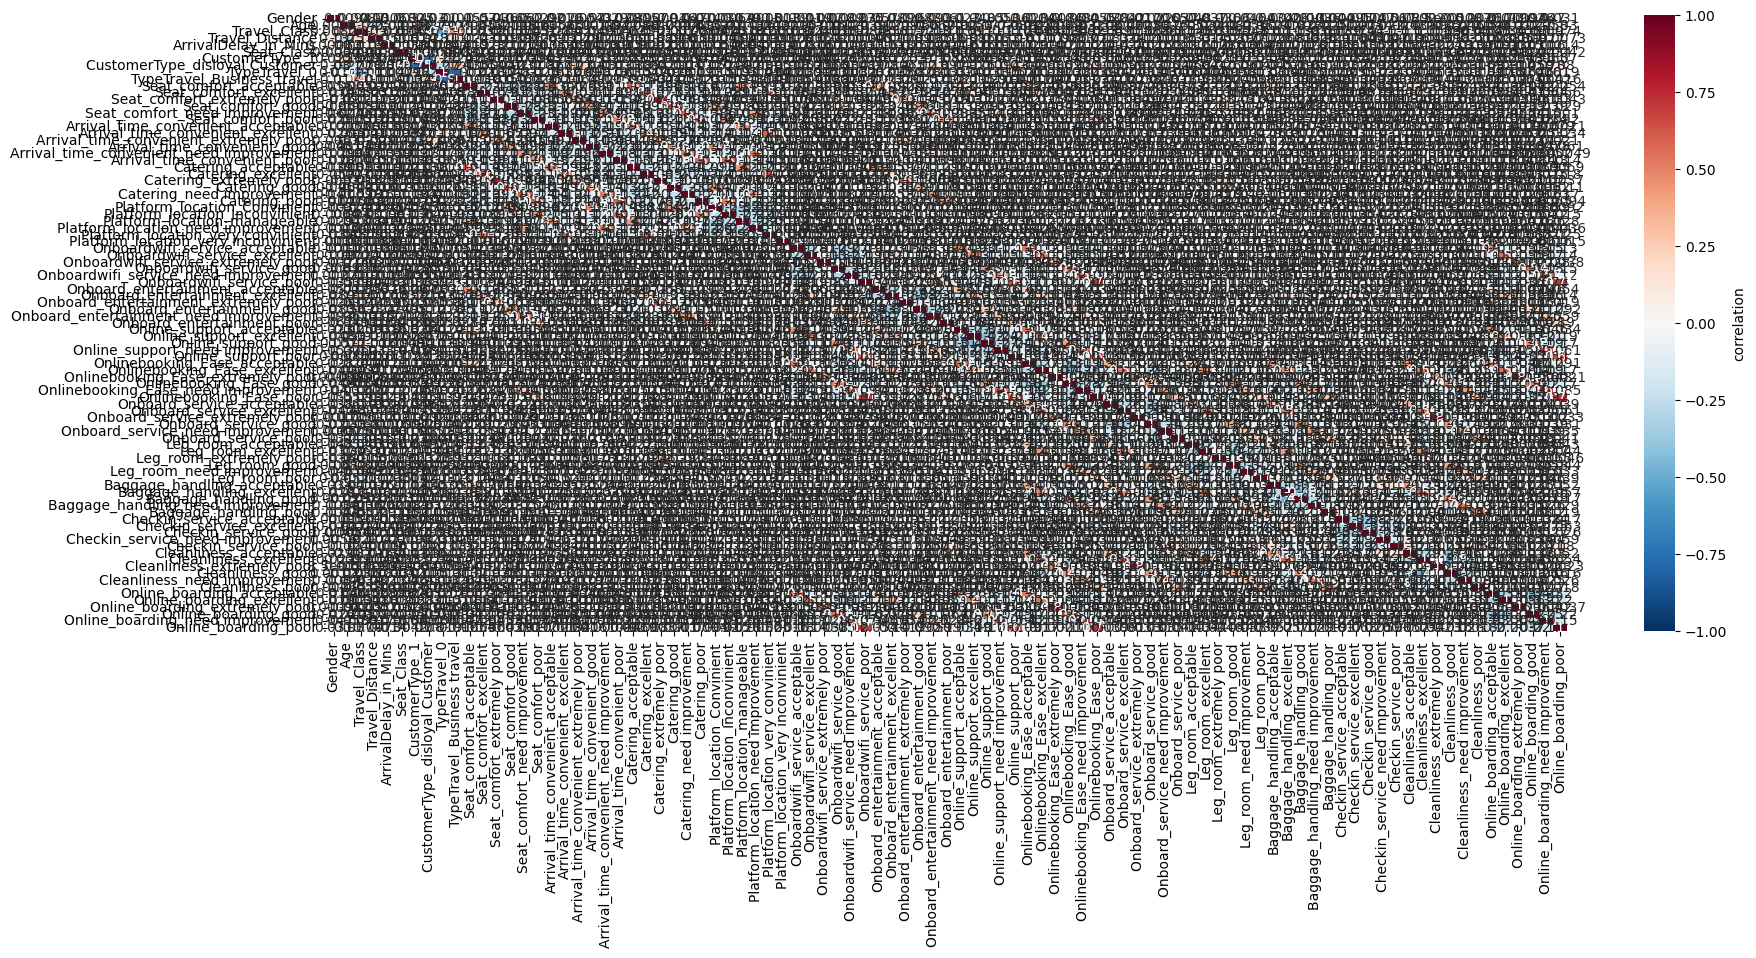

In [ ]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r',
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax)

In [ ]:
X = df.loc[ind_train]
X_test = df.loc[ind_test]

Model - Random Forest

In [ ]:
y=y.astype('int')

print(X.shape, y.shape)
print(type(X),type(y))

(89089, 91) (89089, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rand_forest_classifier_cv = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.954 (0.002)


In [ ]:
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

Conclusion

In [ ]:
X_test.shape

(35602, 92)

In [ ]:
model = rand_forest_classifier_cv

In [ ]:
res = model.predict(X_test)

ValueError: ignored

In [ ]:
sub = pd.DataFrame(X_test)

sub["Overall_Experience"] = res
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

Overall_Experience
ID                          
99900001                   1
99900002                   1
99900003                   1
99900004                   0
99900005                   1
...                      ...
99935598                   0
99935599                   1
99935600                   0
99935601                   1
99935602                   0

[35602 rows x 1 columns]

In [ ]:
data = pd.read_csv('/content/rf_cl_cv_Day2_feature_eng.csv')
data.head()

ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1